In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="whitegrid")

df = pd.read_csv('../data/electric_vehicle_analytics.csv')
df.head()


,Vehicle_ID,Make,Model,Year,Region,Vehicle_Type,Battery_Capacity_kWh,Battery_Health_%,Range_km,Charging_Power_kW,...,Max_Speed_kmh,Acceleration_0_100_kmh_sec,Temperature_C,Usage_Type,CO2_Saved_tons,Maintenance_Cost_USD,Insurance_Cost_USD,Electricity_Cost_USD_per_kWh,Monthly_Charging_Cost_USD,Resale_Value_USD
0,1,Nissan,Leaf,2021,Asia,SUV,101.7,75.5,565,153.6,...,233,8.10,-9.0,Personal,14.13,969,843,0.30,375.55,26483
1,2,Nissan,Leaf,2020,Australia,Sedan,30.1,99.8,157,157.2,...,221,9.83,1.6,Personal,19.41,1157,1186,0.25,532.02,11287
2,3,Hyundai,Kona Electric,2021,North America,SUV,118.5,84.0,677,173.6,...,138,3.60,1.5,Fleet,29.39,291,1890,0.26,1291.68,34023
3,4,Audi,Q4 e-tron,2022,Europe,Hatchback,33.1,97.3,149,169.3,...,192,8.97,12.5,Fleet,6.96,401,2481,0.33,234.44,14398
4,5,Tesla,Model 3,2022,Australia,Truck,81.3,85.6,481,212.8,...,189,7.03,-3.0,Commercial,2.06,214,2336,0.10,32.61,23033


# Análise de Veículos Elétricos

## Entrega 1 – Exploração estatística e comparação de grupos


In [2]:
df.shape
df.info()
df.describe()
df.isna().sum()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 25 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Vehicle_ID                        3000 non-null   int64  
 1   Make                              3000 non-null   object 
 2   Model                             3000 non-null   object 
 3   Year                              3000 non-null   int64  
 4   Region                            3000 non-null   object 
 5   Vehicle_Type                      3000 non-null   object 
 6   Battery_Capacity_kWh              3000 non-null   float64
 7   Battery_Health_%                  3000 non-null   float64
 8   Range_km                          3000 non-null   int64  
 9   Charging_Power_kW                 3000 non-null   float64
 10  Charging_Time_hr                  3000 non-null   float64
 11  Charge_Cycles                     3000 non-null   int64  
 12  Energy

Vehicle_ID                          0
Make                                0
Model                               0
Year                                0
Region                              0
Vehicle_Type                        0
Battery_Capacity_kWh                0
Battery_Health_%                    0
Range_km                            0
Charging_Power_kW                   0
Charging_Time_hr                    0
Charge_Cycles                       0
Energy_Consumption_kWh_per_100km    0
Mileage_km                          0
Avg_Speed_kmh                       0
Max_Speed_kmh                       0
Acceleration_0_100_kmh_sec          0
Temperature_C                       0
Usage_Type                          0
CO2_Saved_tons                      0
Maintenance_Cost_USD                0
Insurance_Cost_USD                  0
Electricity_Cost_USD_per_kWh        0
Monthly_Charging_Cost_USD           0
Resale_Value_USD                    0
dtype: int64

In [3]:
df = df.copy()

for col in df.select_dtypes(include=np.number).columns:
    df[col] = df[col].fillna(df[col].mean())

for col in df.select_dtypes(exclude=np.number).columns:
    df[col] = df[col].fillna(df[col].mode()[0])


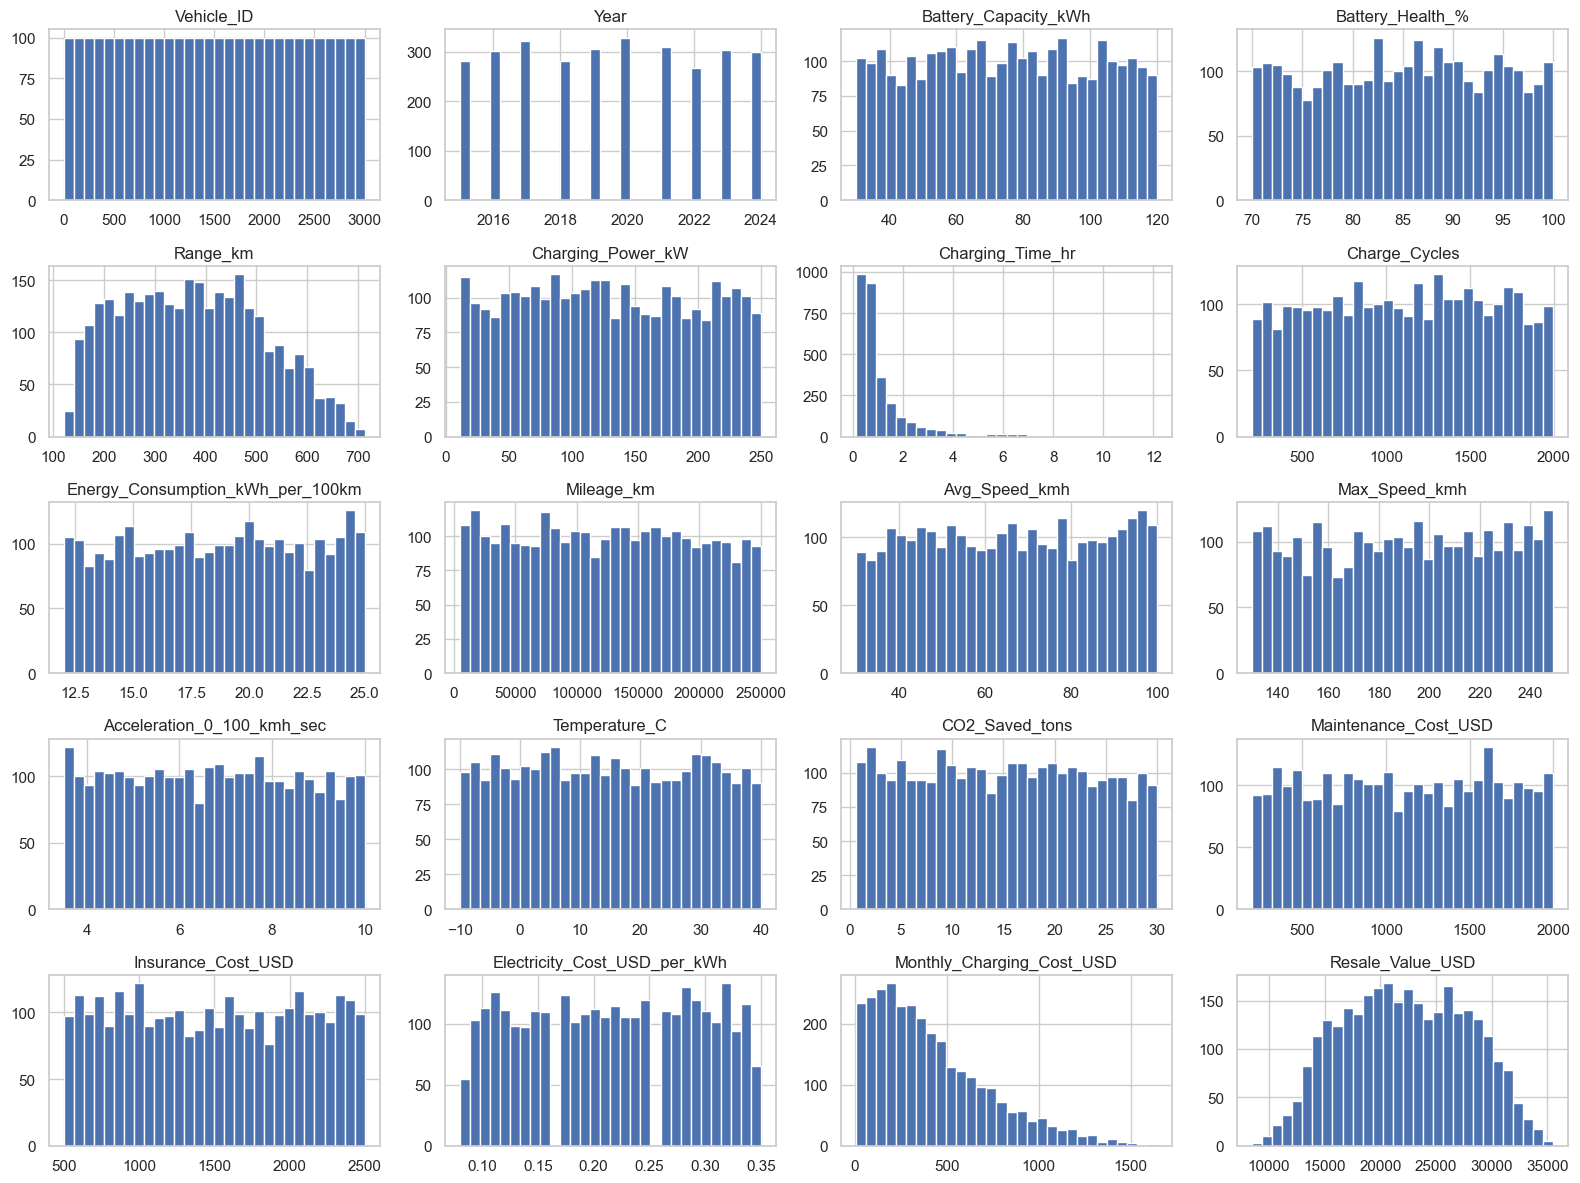

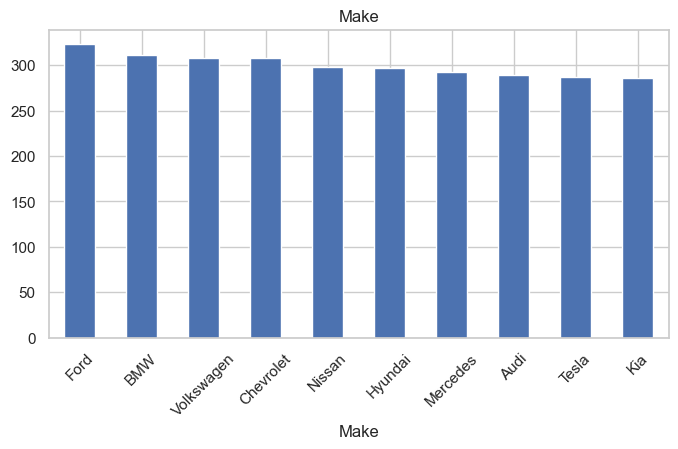

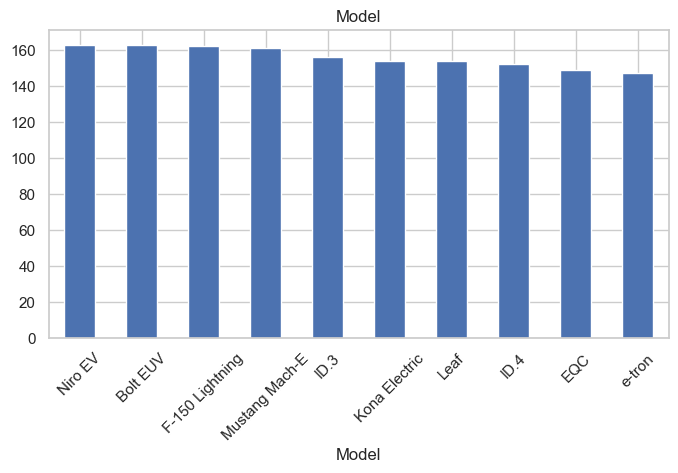

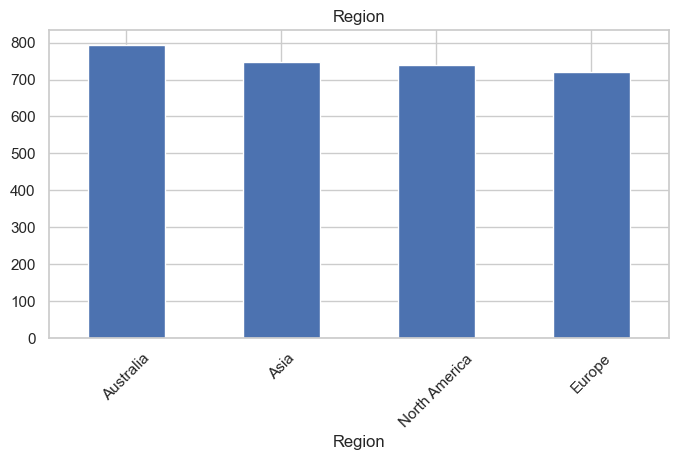

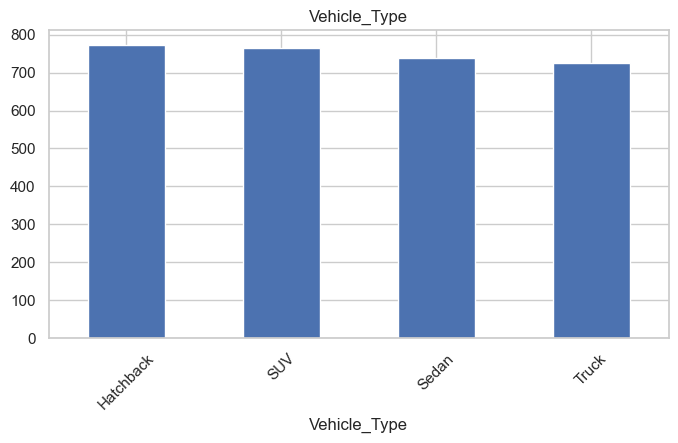

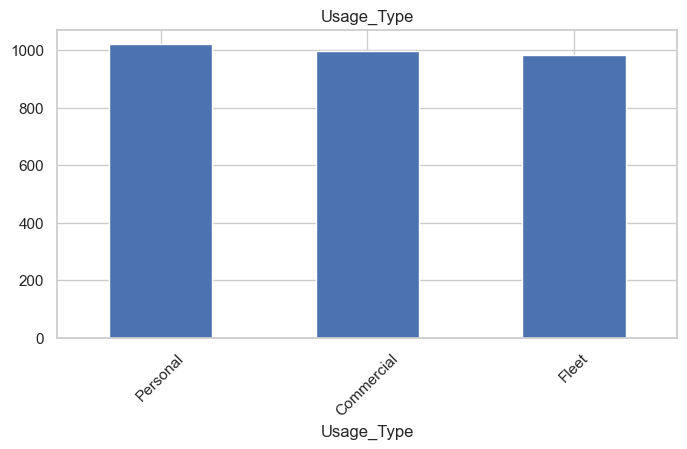

In [4]:
numeric_cols = df.select_dtypes(include=np.number).columns
categorical_cols = df.select_dtypes(exclude=np.number).columns

df[numeric_cols].hist(figsize=(16, 12), bins=30)
plt.tight_layout()
plt.show()

for col in categorical_cols:
    plt.figure(figsize=(8,4))
    df[col].value_counts().head(10).plot(kind='bar')
    plt.title(col)
    plt.xticks(rotation=45)
    plt.show()


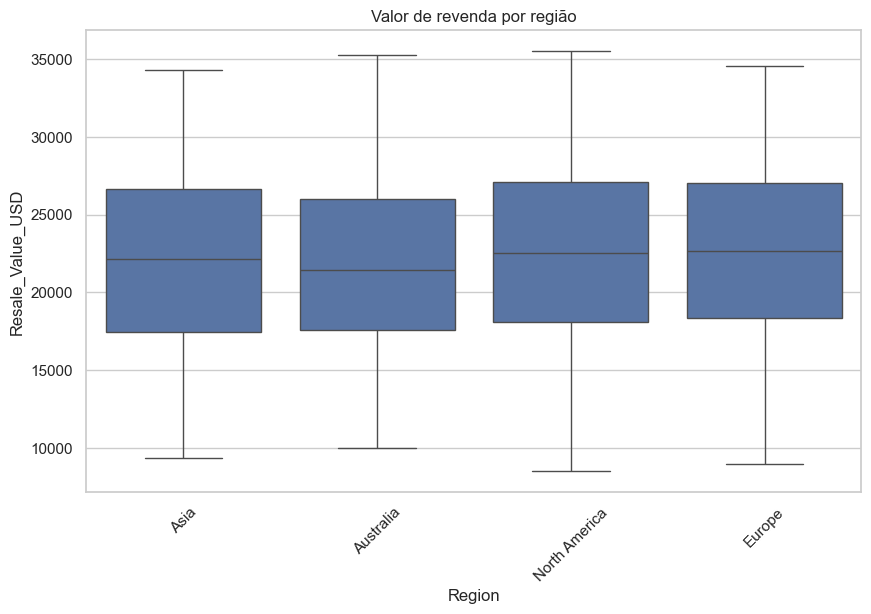

In [5]:
plt.figure(figsize=(10,6))
sns.boxplot(data=df, x='Region', y='Resale_Value_USD')
plt.xticks(rotation=45)
plt.title('Valor de revenda por região')
plt.show()


In [6]:
from scipy.stats import f_oneway

groups = [g['Resale_Value_USD'].values for _, g in df.groupby('Region')]
f_stat, p_value = f_oneway(*groups)
print("F:", f_stat, "p-value:", p_value)


F: 2.9347478817664965 p-value: 0.032176433423494036


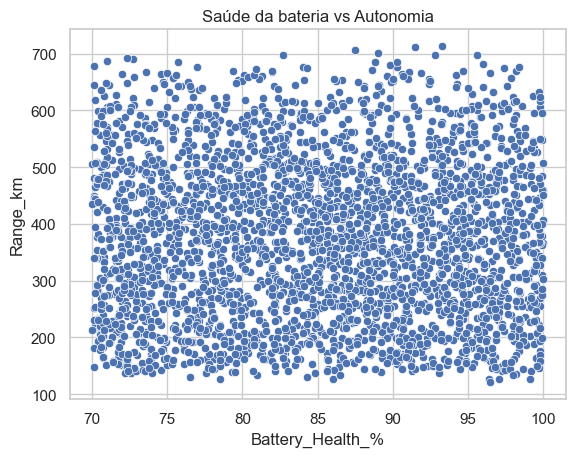

In [7]:
df[['Battery_Health_%', 'Range_km']].corr()
sns.scatterplot(data=df, x='Battery_Health_%', y='Range_km')
plt.title('Saúde da bateria vs Autonomia')
plt.show()
